# ========================================

# Import Dependencies

# ========================================

In [1]:
##################################################################################################
#                            Miscellaneous Operating System Interfaces
##################################################################################################
import os
##################################################################################################
#                       Data Structure and Manipulation (Arrays & Dataframes)
##################################################################################################
import numpy as np
import pandas as pd
##################################################################################################
#                                     Data Visualization
##################################################################################################
import seaborn as sns
# from matplotlib import cm
import matplotlib.pyplot as plt
##################################################################################################
#                                    Statistics Libraries
##################################################################################################
import statistics
import scipy

# ========================================

# File Paths Used in the Notebook

# ========================================

In [2]:
# Format the Input File Path for the Appropriate Operating System
Resources_file_path = os.path.join("Resources", "Data")
Resources_file_path

'Resources/Data'

# ========================================

# Step 1 - Import Student Data

# ========================================

In [3]:
# CSV File Name
student_grade_prediction_csv_file_name = "Student_Grade_Prediction_Data.csv"

In [4]:
# Combine the File Path and the File Name for the Appropriate Operating System
student_grade_prediction_csv_file_path = os.path.join(Resources_file_path, student_grade_prediction_csv_file_name)
student_grade_prediction_csv_file_path

'Resources/Data/Student_Grade_Prediction_Data.csv'

In [5]:
# Read in the CSV File as a Dataframe
student_grade_prediction_df = pd.read_csv(student_grade_prediction_csv_file_path)

student_grade_prediction_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# ========================================

# Step 2 - Check Data for Nulls

# ========================================

In [6]:
# Check the Dataframe for Null Values
student_grade_prediction_df_check_nan = student_grade_prediction_df.isnull().values.any()

if student_grade_prediction_df_check_nan == True:
    print("The Dataframe has Null Values!!!!!")
#     student_grade_prediction_df_check_nan = student_grade_prediction_df['API'].isnull().sum()
#     print(f"There are {heart_df_count_nan} null values in the dataframe.")

# ========================================

# Step 3 - Evaluate the Column Headers and Their Data Types

# ========================================

In [7]:
# Column Headers

student_grade_prediction_df.keys()

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [8]:
# Column Headers and Their Data Types

# Reference:
#     - Convert a Series to a Dataframe
#         - https://pandas.pydata.org/docs/reference/api/pandas.Series.to_frame.html

student_grade_prediction_dtypes_df = student_grade_prediction_df.dtypes.to_frame().reset_index()
student_grade_prediction_dtypes_df = student_grade_prediction_dtypes_df.rename(columns={"index": "Column_Headers", 0: "dtype"})

print(type(student_grade_prediction_dtypes_df))
student_grade_prediction_dtypes_df

<class 'pandas.core.frame.DataFrame'>


,Column_Headers,dtype
0,school,object
1,sex,object
2,age,int64
3,address,object
4,famsize,object
5,Pstatus,object
6,Medu,int64
7,Fedu,int64
8,Mjob,object
9,Fjob,object


## Step 3.1 Column Header Details

# ========================================

# Step 4 - Check the Statistics of the Data

# ========================================

# Step 4.1 - Intial Statistics Using Pandas Describe Function

In [9]:
# Reference:
#     - Pandas Describe
#         - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
#     - Show All Columns/Rows of a Pandas Dataframe
#         - https://towardsdatascience.com/how-to-show-all-columns-rows-of-a-pandas-dataframe-c49d4507fcf
#         - https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

# percentile list
perc =[.20, .40, .60, .80]

# list of dtypes to include
include =['object', 'float', 'int']

student_grade_prediction_df_dscrb = student_grade_prediction_df.describe(percentiles = perc, include = include)
pd.set_option('display.max_columns', None)
student_grade_prediction_df_dscrb

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395,395,395.000000,395,395,395,395.000000,395.000000,395,395,395,395,395.000000,395.000000,395.000000,395,395,395,395,395,395,395,395,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
unique,2,2,NaN,2,2,2,NaN,NaN,5,5,4,3,NaN,NaN,NaN,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GP,F,NaN,U,GT3,T,NaN,NaN,other,other,course,mother,NaN,NaN,NaN,no,yes,no,yes,yes,yes,yes,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,349,208,NaN,307,281,354,NaN,NaN,141,217,145,273,NaN,NaN,NaN,344,242,214,201,314,375,329,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.696203,NaN,NaN,NaN,2.749367,2.521519,NaN,NaN,NaN,NaN,1.448101,2.035443,0.334177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,NaN,NaN,1.276043,NaN,NaN,NaN,1.094735,1.088201,NaN,NaN,NaN,NaN,0.697505,0.839240,0.743651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,NaN,NaN,15.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
20%,NaN,NaN,15.000000,NaN,NaN,NaN,2.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,2.000000,2.000000,1.000000,1.000000,2.000000,0.000000,8.000000,8.000000,8.000000
40%,NaN,NaN,16.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,3.000000,2.000000,10.000000,10.000000,10.000000
50%,NaN,NaN,17.000000,NaN,NaN,NaN,3.000000,2.000000,NaN,NaN,NaN,NaN,1.000000,2.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000


# Step 4.2 - Intial Statistics Using Pandas Describe Function

In [10]:
student_grade_prediction_df.value_counts(student_grade_prediction_df.age)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

# Step 4.1.1 - Observations from the intial Statistics

In [11]:


for dtype_indx in student_grade_prediction_dtypes_df.index:
#     print(dtype_indx)

    if student_grade_prediction_dtypes_df["dtype"][dtype_indx] == "int64":
#         print(student_grade_prediction_dtypes_df["Column_Headers"][dtype_indx])
#         print(student_grade_prediction_dtypes_df["dtype"][dtype_indx])

        clmn_hdrs_nm = student_grade_prediction_dtypes_df["Column_Headers"][dtype_indx]
     
        print(f"{clmn_hdrs_nm} Mean: {statistics.mean(student_grade_prediction_df[clmn_hdrs_nm])}")
        print(f"{clmn_hdrs_nm} Median: {statistics.median(student_grade_prediction_df[clmn_hdrs_nm])}")
        print(f"{clmn_hdrs_nm} Mode: {statistics.mode(student_grade_prediction_df[clmn_hdrs_nm])}")
        print(f"{clmn_hdrs_nm} Variance: {statistics.variance(student_grade_prediction_df[clmn_hdrs_nm])}")
        
        zscore_ndarray =  scipy.stats.zscore(student_grade_prediction_df[clmn_hdrs_nm])
        zscore_df = pd.DataFrame(zscore_ndarray)
#         print(f"{clmn_hdrs_nm} Z-Score: {type(scipy.stats.zscore(student_grade_prediction_df[clmn_hdrs_nm]))}")

#         ax = student_grade_prediction_df.plot(x = clmn_hdrs_nm, y = ""

        print("----------------------------------------------------")

age Mean: 16.696202531645568
age Median: 17
age Mode: 16
age Variance: 1.6282850350189553
----------------------------------------------------
Medu Mean: 2.749367088607595
Medu Median: 3
Medu Mode: 4
Medu Variance: 1.198445029878558
----------------------------------------------------
Fedu Mean: 2.5215189873417723
Fedu Median: 2
Fedu Mode: 2
Fedu Variance: 1.1841804279380583
----------------------------------------------------
traveltime Mean: 1.4481012658227848
traveltime Median: 1
traveltime Mode: 1
traveltime Variance: 0.48651288312022106
----------------------------------------------------
studytime Mean: 2.0354430379746837
studytime Median: 2
studytime Mode: 2
studytime Variance: 0.7043243590567372
----------------------------------------------------
failures Mean: 0.3341772151898734
failures Median: 0
failures Mode: 0
failures Variance: 0.5530167705455247
----------------------------------------------------
famrel Mean: 3.9443037974683546
famrel Median: 4
famrel Mode: 4
famrel Va

In [12]:
zscore_df.groupby([0]).count()

""
0
-2.276226
-1.402031
-1.183483
-0.964934
-0.746385
-0.527837
-0.309288
-0.090739
0.127809


In [13]:
print(f"Age Median: {statistics.median(student_grade_prediction_df['age'])}")
print(f"Age Mode: {statistics.mode(student_grade_prediction_df['age'])}")
print("----------------------------------------------------")
print(f"Age Median: {statistics.median(student_grade_prediction_df['age'])}")
print(f"Age Mode: {statistics.mode(student_grade_prediction_df['age'])}")
print("----------------------------------------------------")
print(f"Age Median: {statistics.median(student_grade_prediction_df['age'])}")
print(f"Age Mode: {statistics.mode(student_grade_prediction_df['age'])}")
print("----------------------------------------------------")
print(f"Age Median: {statistics.median(student_grade_prediction_df['age'])}")
print(f"Age Mode: {statistics.mode(student_grade_prediction_df['age'])}")
print("----------------------------------------------------")

Age Median: 17
Age Mode: 16
----------------------------------------------------
Age Median: 17
Age Mode: 16
----------------------------------------------------
Age Median: 17
Age Mode: 16
----------------------------------------------------
Age Median: 17
Age Mode: 16
----------------------------------------------------


# ========================================

# Step 3 - Manipulate the Data for Plots

# ========================================

# ========================================

# Step 3 - Plots the Data

# ========================================

## Step 3.1 - Quick Scatter Plots and Histograms 

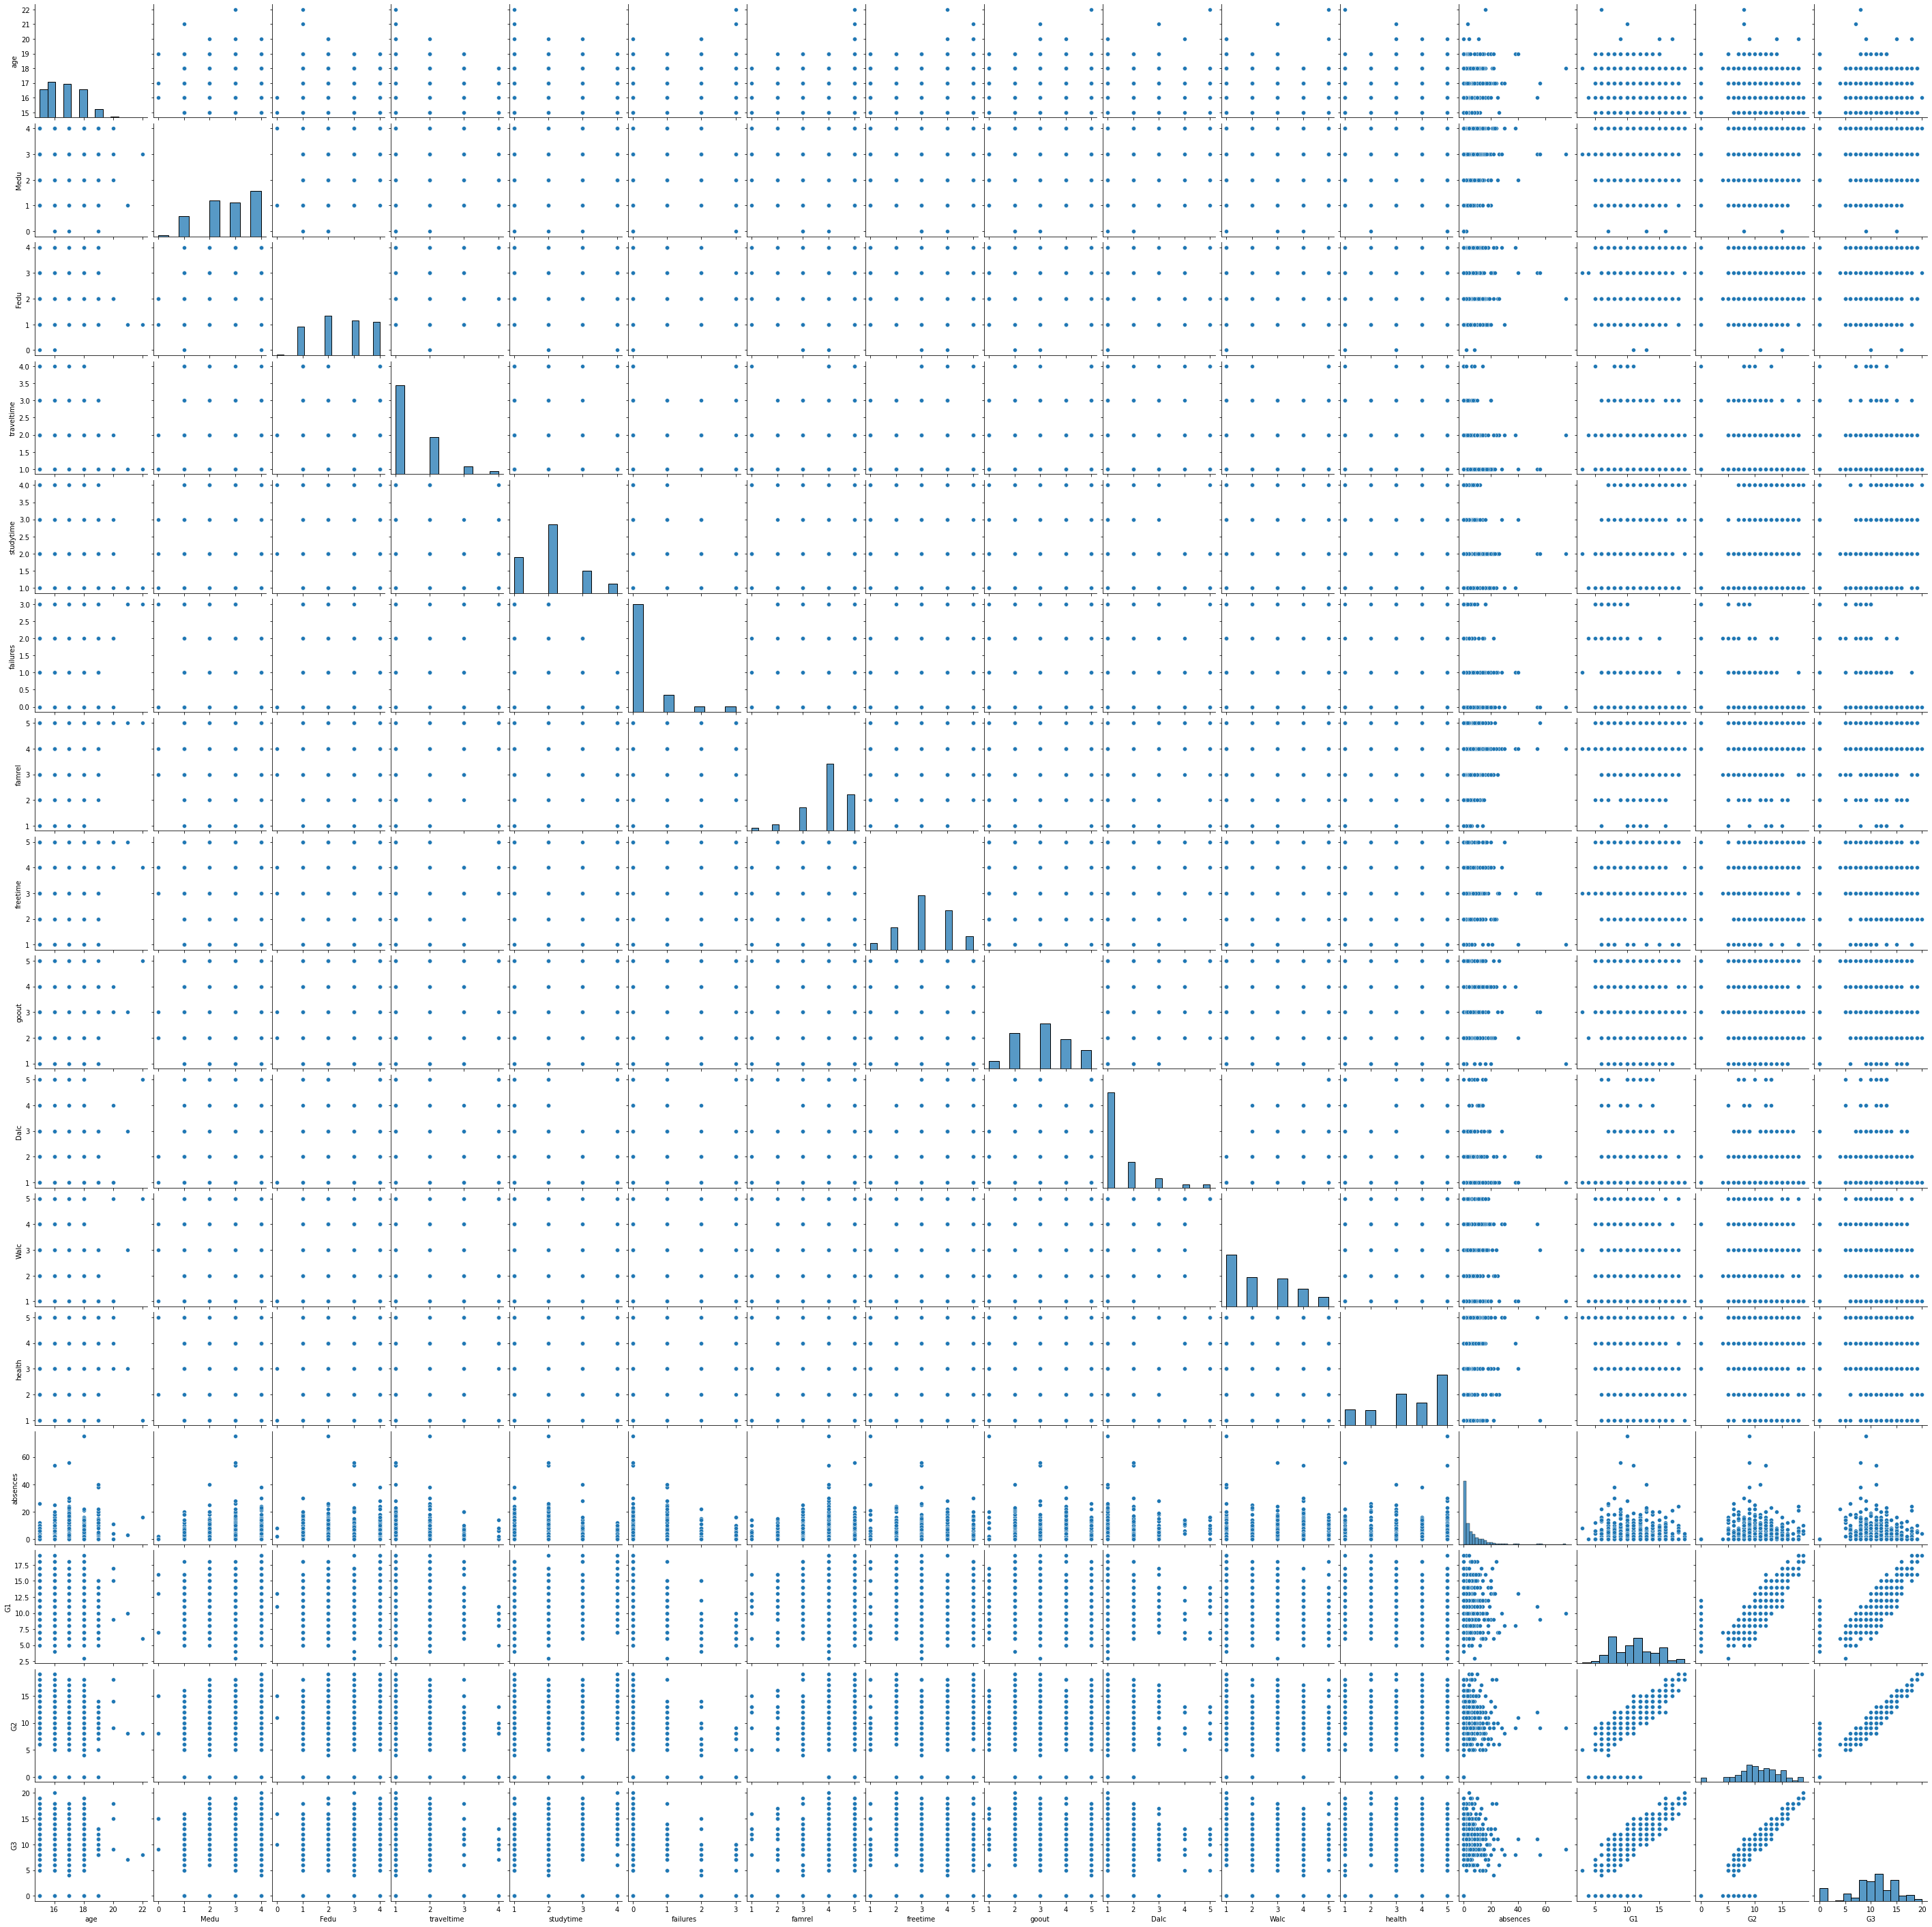

In [14]:
# Reference: 
#     - Seaborn.pairplot()
#         - https://seaborn.pydata.org/generated/seaborn.pairplot.html

sns.pairplot(data = student_grade_prediction_df)

## Step 3.2 - Boxplots

### Step 3.2.1 - Seaborn Boxplots

age


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


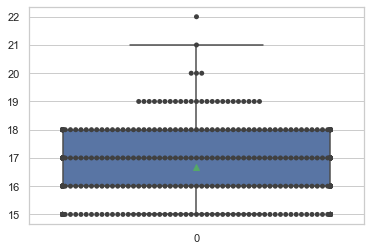

Medu


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 47.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


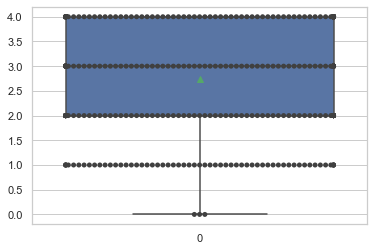

Fedu


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


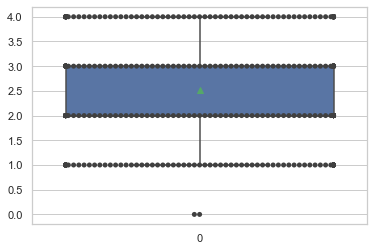

traveltime


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


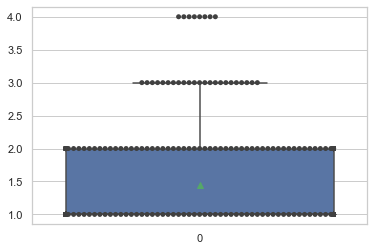

studytime


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


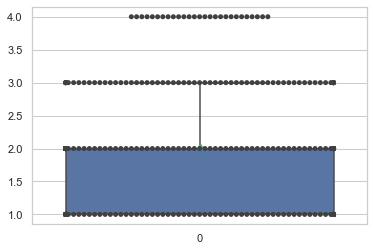

failures


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


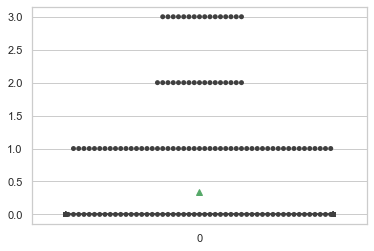

famrel


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 54.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


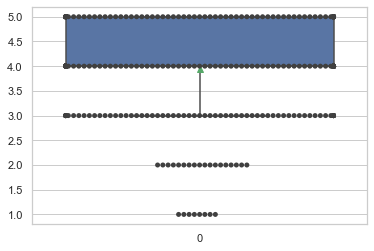

freetime


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 46.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


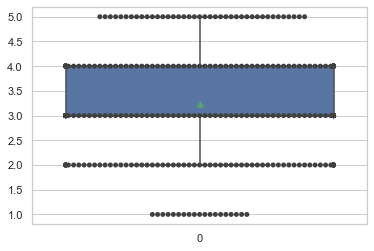

goout


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 42.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


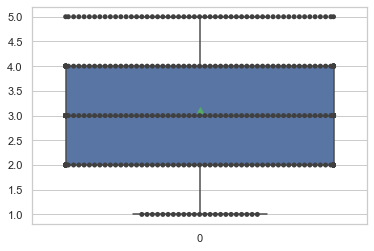

Dalc


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


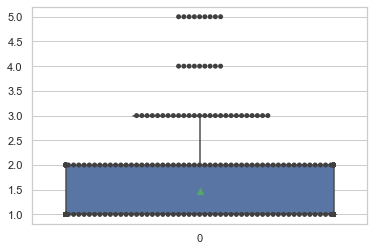

Walc


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


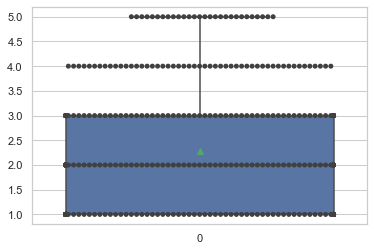

health


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


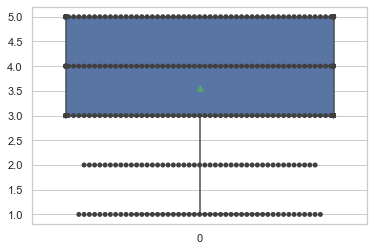

absences


/Users/vincentadams/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 24.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


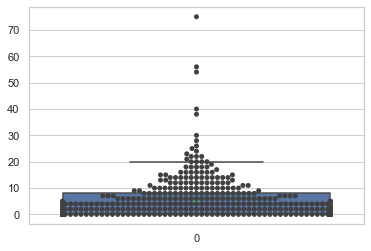

G1


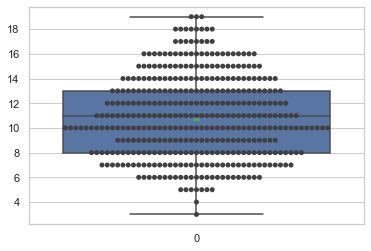

G2


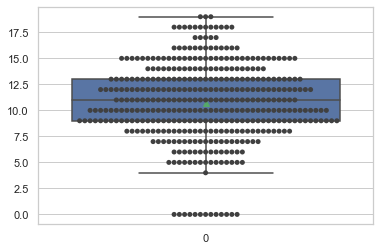

G3


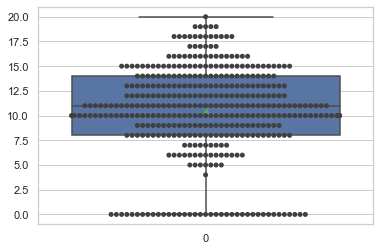

In [15]:
# References:
#     - Seaborn Boxplot
#         - https://seaborn.pydata.org/generated/seaborn.boxplot.html
#     - Use swarmplot() to show datapoints on top of the boxes
#         - https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot


for indx in student_grade_prediction_dtypes_df.index:
#     print(indx)
    if student_grade_prediction_dtypes_df["dtype"][indx] == "int64":
        clmn_hdr = student_grade_prediction_dtypes_df['Column_Headers'][indx]
        
        print(f"{clmn_hdr}")


        sns.set(style="whitegrid")
        tips = sns.load_dataset("tips")

        ax = sns.boxplot(data=student_grade_prediction_df[clmn_hdr], 
                         showfliers = False, 
                         showmeans = True)

        ax = sns.swarmplot(data=student_grade_prediction_df[clmn_hdr], 
                           color=".25")

        plt.show()

### Step 3.2.2 - Matplotlib Boxplots

age


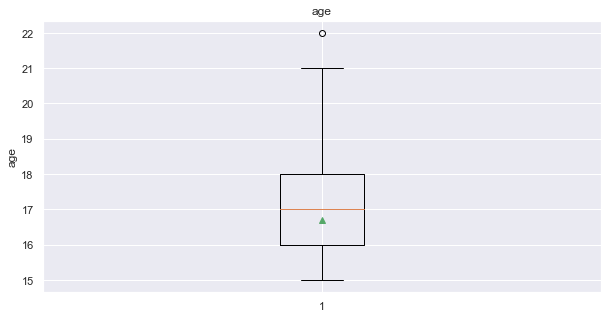

Medu


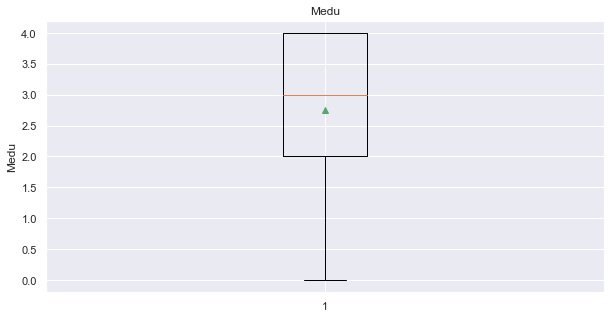

Fedu


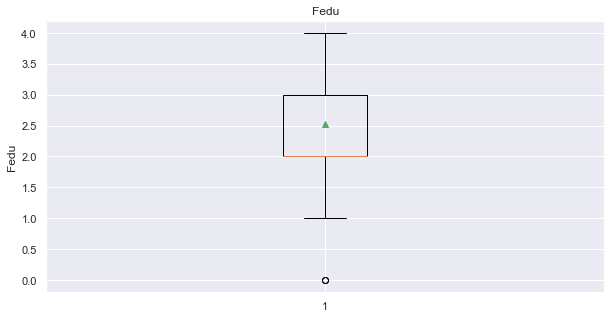

traveltime


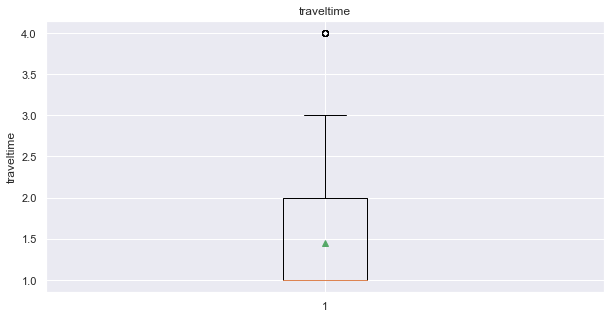

studytime


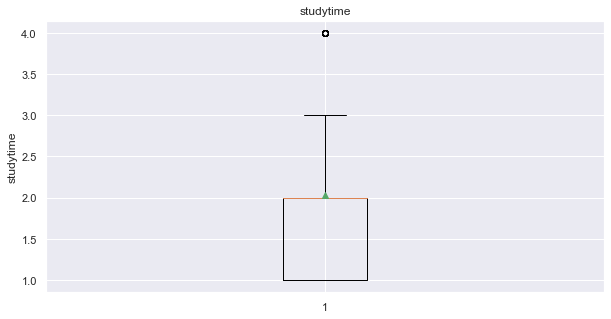

failures


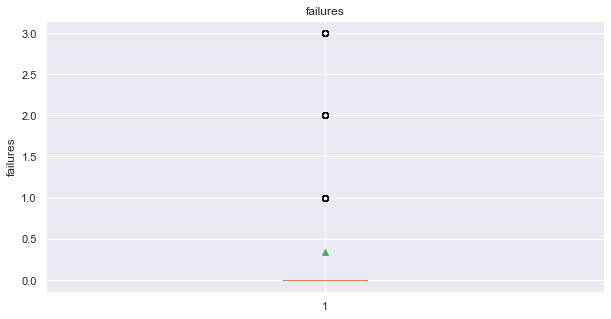

famrel


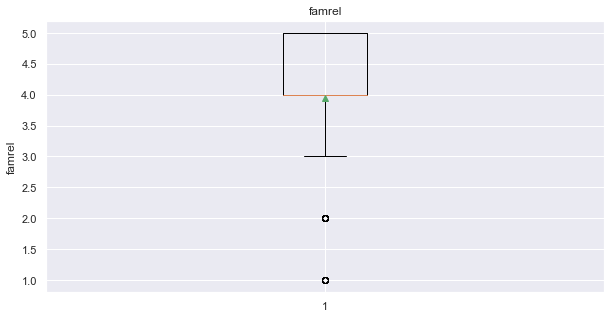

freetime


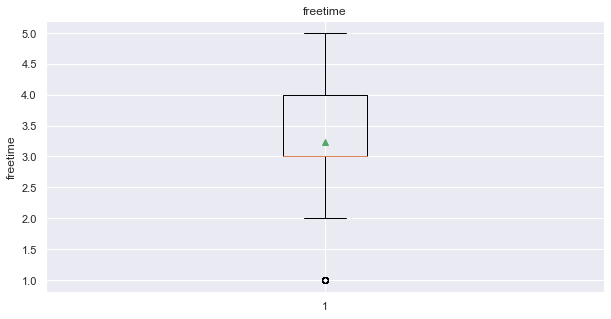

goout


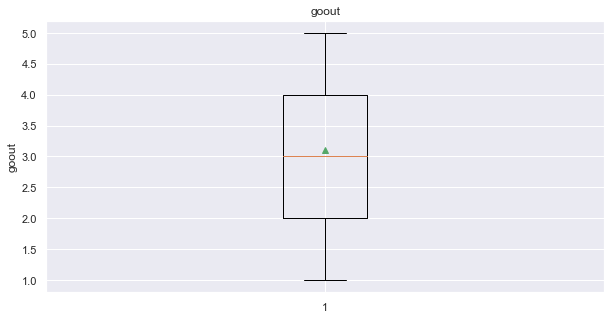

Dalc


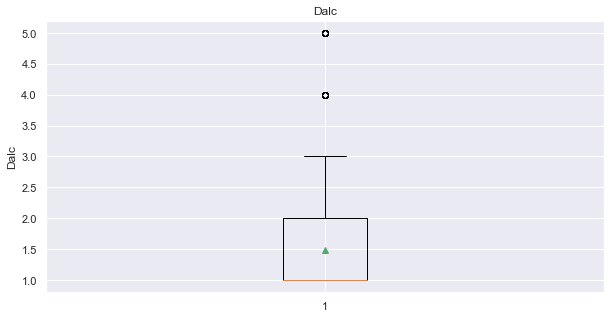

Walc


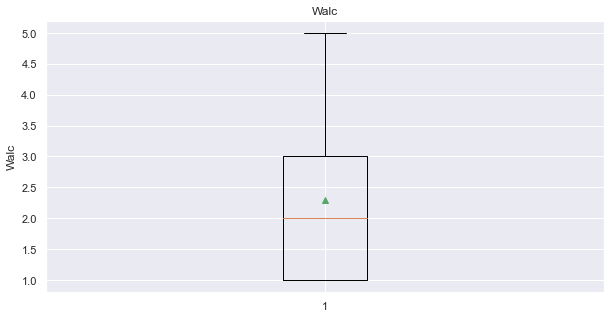

health


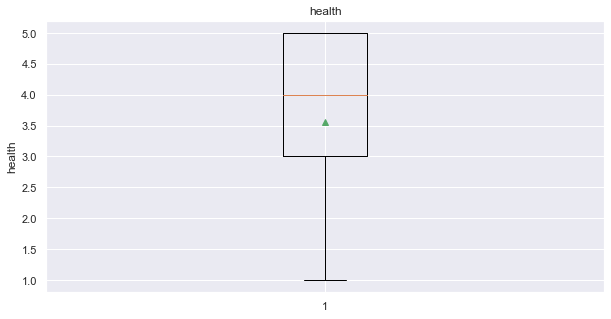

absences


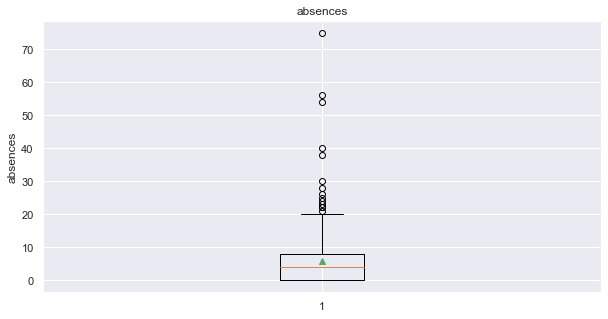

G1


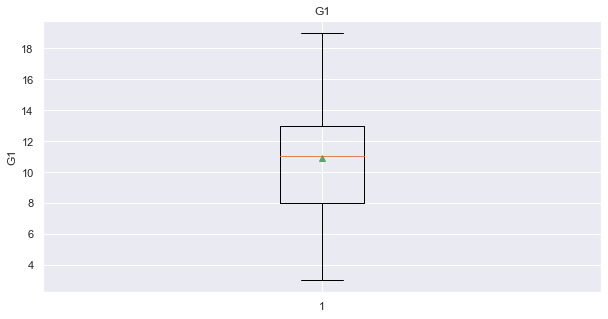

G2


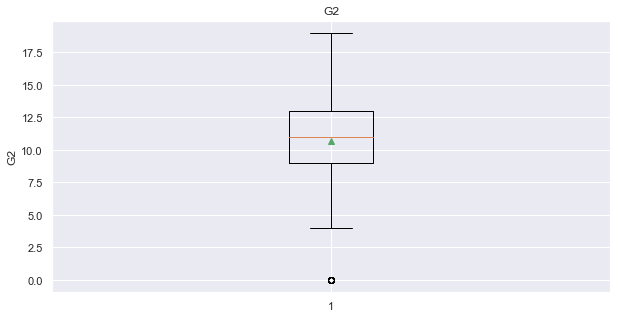

G3


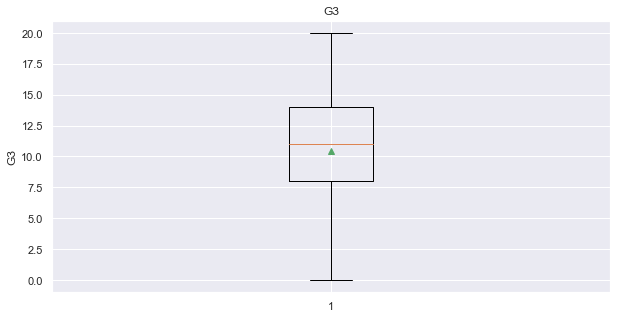

In [25]:
for indx in student_grade_prediction_dtypes_df.index:
#     print(indx)
    if student_grade_prediction_dtypes_df["dtype"][indx] == "int64":
        clmn_hdr = student_grade_prediction_dtypes_df['Column_Headers'][indx]
        
        print(f"{clmn_hdr}")

        plt.figure(figsize = (10,5))
        plt.title(clmn_hdr)
        plt.ylabel(clmn_hdr)
        plt.boxplot(student_grade_prediction_df[clmn_hdr], showmeans = True)
        plt.show()

## Step 3.3 - Histograms

In [17]:
sns.distplot(data=student_grade_prediction_df["age"], 
             x="flipper_length_mm")

TypeError: distplot() got an unexpected keyword argument 'data'

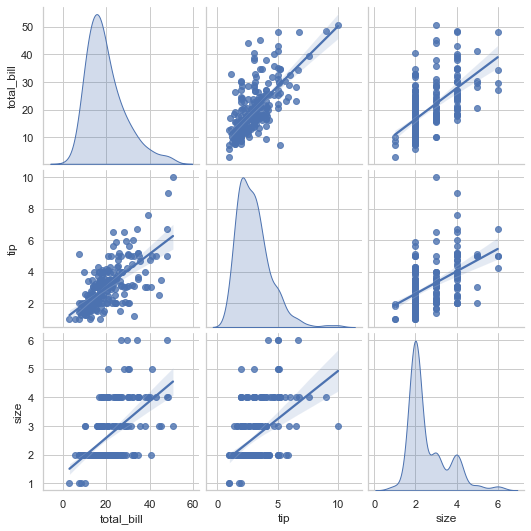

In [18]:
heart_seaborn = sns.load_dataset("tips")
heart_seaborn.head()

sns.pairplot(data = heart_seaborn, diag_kind = "kde", kind = "reg")

KeyError: 'age'

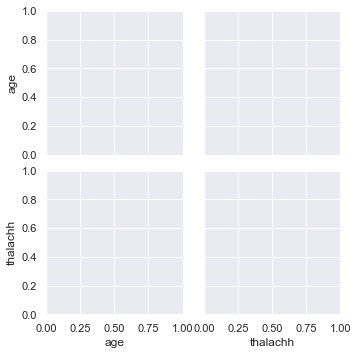

In [21]:
sns.set_style("darkgrid")

# Create the Default Pairplot
sns.pairplot(data = heart_df, hue = "sex", kind = "reg", vars = ["age", "thalachh"])
plt.show()